### Microsoft Stock Price Prediction

In [1]:
# Importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

sns.set()
plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv("MSFT.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-14,204.240005,209.199997,204.029999,205.410004,203.542297,30375800
1,2020-09-15,208.419998,209.779999,206.929993,208.779999,206.881653,21823900
2,2020-09-16,210.619995,210.649994,204.639999,205.050003,203.185562,26328100
3,2020-09-17,200.050003,204.330002,199.960007,202.910004,201.065033,34011300
4,2020-09-18,202.800003,203.649994,196.250000,200.389999,198.567947,55225300


In this dataset, the Close column contains the values whose future values we want to predict. So let’s have a closer look at the historical close prices of Microsoft’s stock price:

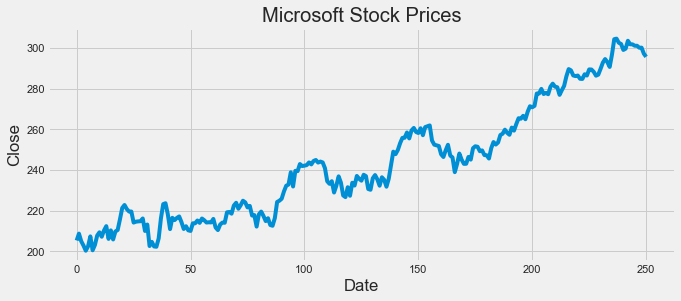

In [4]:
plt.figure(figsize=(10, 4))
plt.title("Microsoft Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

In [5]:
# Let's have look at correlation between the feature of this data

data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998256,0.998374,0.996023,0.996031,-0.388101
High,0.998256,1.000000,0.998455,0.998336,0.998314,-0.373242
Low,0.998374,0.998455,1.000000,0.998472,0.998496,-0.405670
Close,0.996023,0.998336,0.998472,1.000000,0.999955,-0.393462
Adj Close,0.996031,0.998314,0.998496,0.999955,1.000000,-0.393428
Volume,-0.388101,-0.373242,-0.405670,-0.393462,-0.393428,1.000000


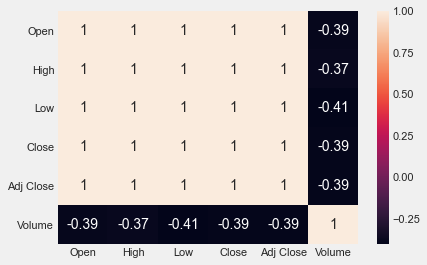

In [7]:
sns.heatmap(data.corr(), annot = True)


In [8]:
X = data[["Open", "High", "Low"]]
y = data["Close"]

In [9]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [11]:
len(X)

251

In [10]:
# now we have to devide the data set into trainning and test set 

from sklearn.model_selection import train_test_split


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now let’s use the Decision Tree Regression Algorithm to train the Microsoft Stock Price prediction model and have a look at the predicted stock prices for the next 5 days:

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
model = DecisionTreeRegressor()

In [15]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [16]:
y_pred = model.predict(X_test)

In [17]:
y_pred

array([262.630005, 202.679993, 249.899994, 214.800003, 233.270004,
       250.779999, 265.019989, 297.25    , 202.679993, 225.949997,
       251.490005, 289.459991, 286.540009, 246.479996, 222.589996,
       289.459991, 265.019989, 209.830002, 227.559998, 222.75    ,
       297.25    , 211.800003, 233.869995, 219.279999, 249.679993,
       216.509995, 216.440002, 210.110001, 211.009995, 294.600006,
       302.619995, 206.429993, 286.950012, 265.019989, 219.619995,
       237.130005, 210.330002, 224.149994, 234.509995, 217.899994,
       227.559998, 237.580002, 214.889999, 214.800003, 261.549988,
       206.190002, 214.889999, 233.869995, 243.699997, 222.419998,
       249.729996])

In [18]:
new_data = pd.DataFrame({"Predicted rate": y_pred})

In [19]:
new_data.head()

,Predicted rate
0,262.630005
1,202.679993
2,249.899994
3,214.800003
4,233.270004


In [20]:
len(new_data)

51

In [21]:
# next five day prediction
new_data.head(5)

,Predicted rate
0,262.630005
1,202.679993
2,249.899994
3,214.800003
4,233.270004
